In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
file_path = '/home/mehul/Documents/training/python/data/sales.csv'

In [10]:
d1 = pd.read_csv(file_path, parse_dates=['date'])
d1

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


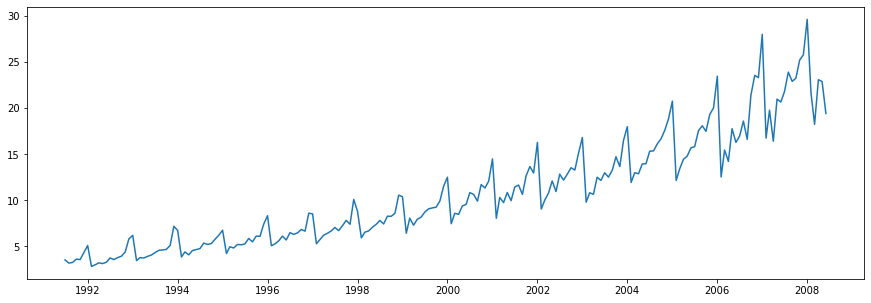

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(d1.date, d1.value)
plt.show()

# Seasonal plot

In [12]:
d1

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [16]:
d1['year'] = [d.year for d in d1.date]
d1['month'] = [d.strftime('%b') for d in d1.date]
d1

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [30]:
d2 = d1[d1['year'] != 1991]
d2

,date,value,year,month
6,1992-01-01,5.088335,1992,Jan
7,1992-02-01,2.814520,1992,Feb
8,1992-03-01,2.985811,1992,Mar
9,1992-04-01,3.204780,1992,Apr
10,1992-05-01,3.127578,1992,May
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [38]:
d2.loc[d2.year == year, 'value'][-1:].values[0]

19.431739999999998

In [31]:
years = d2['year'].unique()
len(years)

17

In [32]:
colorkeys = mpl.colors.XKCD_COLORS.keys()
colors = np.random.choice(list(colorkeys), len(years))
colors

array(['xkcd:rusty red', 'xkcd:very light purple', 'xkcd:baby shit green',
       'xkcd:poison green', 'xkcd:yellowish tan', 'xkcd:bright lilac',
       'xkcd:twilight', 'xkcd:dirt brown', 'xkcd:light lime',
       'xkcd:yellowy brown', 'xkcd:denim', 'xkcd:reddish',
       'xkcd:greyish purple', 'xkcd:rust brown', 'xkcd:peach',
       'xkcd:muted pink', 'xkcd:light urple'], dtype='<U31')

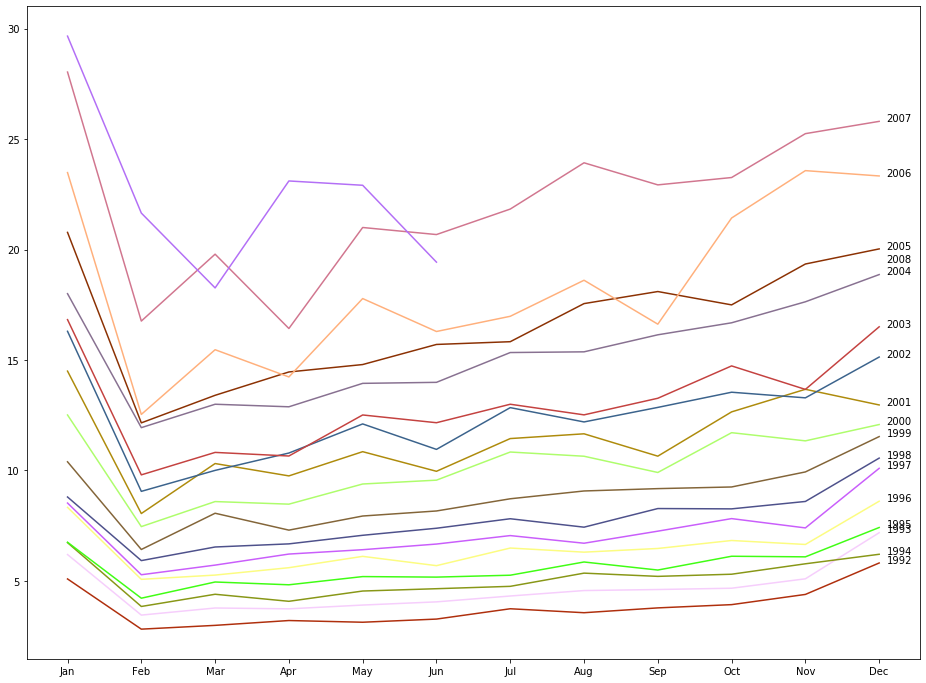

In [42]:
plt.figure(figsize=(16, 12))
for i, year in enumerate(years):
    plt.plot('month', 'value', data=d2.loc[d2.year == year], color=colors[i])
    plt.text(11.1, d2.loc[d2.year == year, 'value'][-1:].values[0], year)

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
d1

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [57]:
d4 = pd.DataFrame(d1)
del d4['year']
del d4['month']
d4.index = d1.date
del d4['date']
d4

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [60]:
result_add = seasonal_decompose(d4['value'], model='additive', extrapolate_trend='freq')

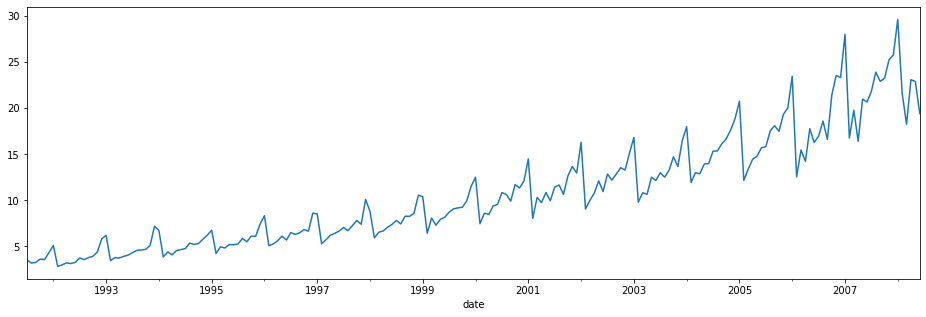

In [61]:
plt.figure(figsize=(16, 5))
result_add.observed.plot()
plt.show()

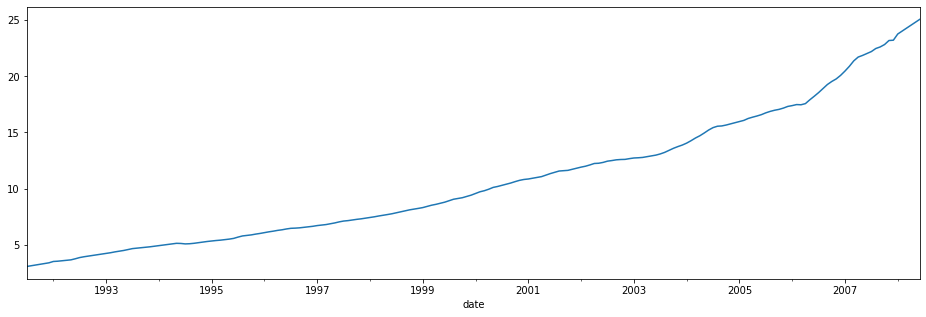

In [62]:
plt.figure(figsize=(16, 5))
result_add.trend.plot()
plt.show()

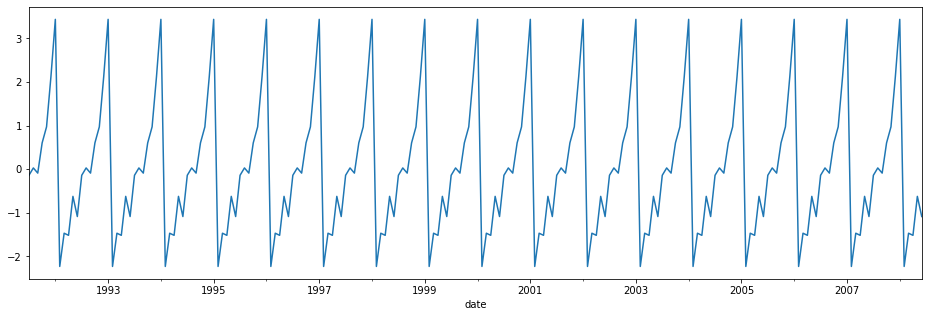

In [63]:
plt.figure(figsize=(16, 5))
result_add.seasonal.plot()
plt.show()

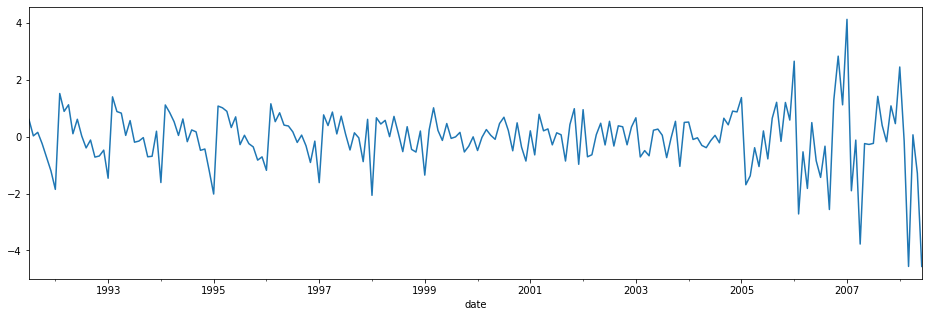

In [64]:
plt.figure(figsize=(16, 5))
result_add.resid.plot()
plt.show()

In [65]:
result_mul = seasonal_decompose(d4['value'], model='multiplicative', extrapolate_trend='freq')

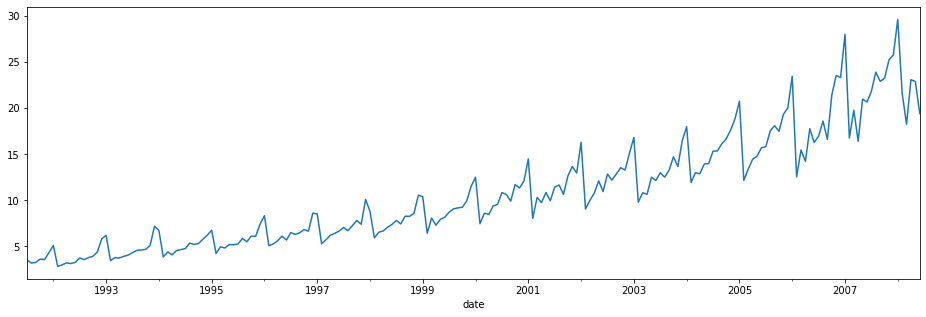

In [66]:
plt.figure(figsize=(16, 5))
result_mul.observed.plot()
plt.show()

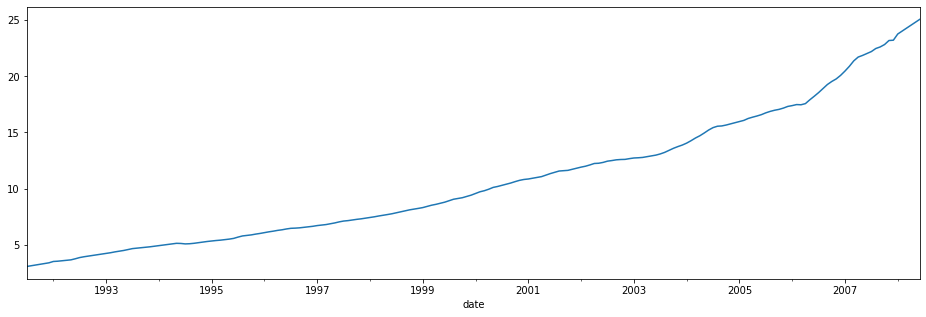

In [67]:
plt.figure(figsize=(16, 5))
result_mul.trend.plot()
plt.show()

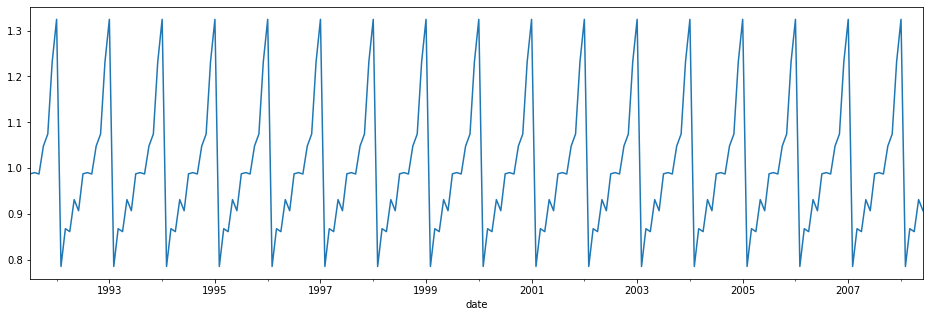

In [68]:
plt.figure(figsize=(16, 5))
result_mul.seasonal.plot()
plt.show()

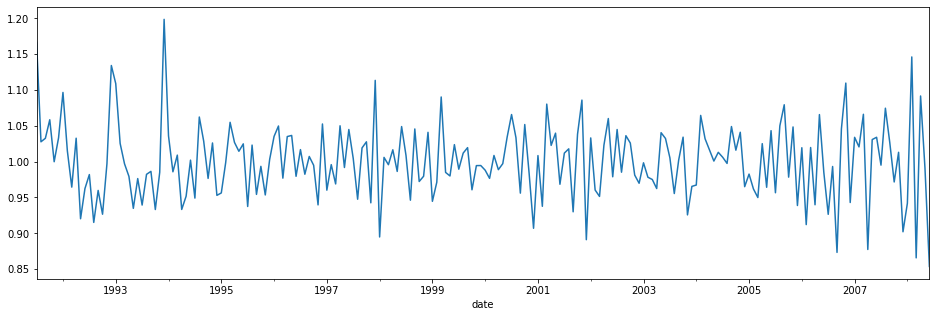

In [69]:
plt.figure(figsize=(16, 5))
result_mul.resid.plot()
plt.show()